In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/apps_dataset.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,id,url,title,tagline,developer,developer_link,icon,rating,reviews_count,description,description_raw,pricing_hint
0,1,https://apps.shopify.com/powr-hit-counter,Hit Counter,Boost sales using social proof with a simple h...,POWr.io,https://apps.shopify.com/partners/powr-io,https://apps.shopifycdn.com/listing_images/16e...,4.4,39,Show off your site traffic using Hit Counter f...,"<div class=""block"">\n <h4>Show off ...",NaN
1,2,https://apps.shopify.com/uncomplicated-categories,Categories Uncomplicated,"Categories for Shopify, done the right way",Lightenna Ltd,https://apps.shopify.com/partners/lightenna,https://apps.shopifycdn.com/listing_images/906...,5.0,34,Simple categories for Shopify collections \n O...,"<div class=""block"">\n <h4>Simple ca...",10-day free trial
2,3,https://apps.shopify.com/ads,Ads by Varinode,Free Ad exchange to help you acquire high qual...,"Varinode, Inc.",https://apps.shopify.com/partners/developer-77...,https://apps.shopifycdn.com/listing_images/138...,4.9,3336,"For a limited time, all new installs will rece...","<div class=""block"">\n <h4>For a lim...",NaN
3,4,https://apps.shopify.com/all-in-one-metafields,All in One Metafields,Create And Handle Everything Related To Custom...,Identix Web,https://apps.shopify.com/partners/identix-web,https://apps.shopifycdn.com/listing_images/720...,4.9,11,Simple & Easy To Use \n Custom meta fields for...,"<div class=""block"">\n <h4>Simple &a...",7-day free trial
4,5,https://apps.shopify.com/extra-product-options,Product Options and Customizer,Create extra and unlimited product options (pr...,SolverCircle,https://apps.shopify.com/partners/solvercircle,https://apps.shopifycdn.com/listing_images/a7d...,4.3,70,FREE Installation Service. Just follow these 3...,"<div class=""block"">\n <h4>FREE Inst...",10-day free trial


In [4]:
df.columns

Index(['id', 'url', 'title', 'tagline', 'developer', 'developer_link', 'icon',
       'rating', 'reviews_count', 'description', 'description_raw',
       'pricing_hint'],
      dtype='object')

In [5]:
df.isnull().sum()

id                    0
url                   0
title                 0
tagline               0
developer             0
developer_link        0
icon                  0
rating                0
reviews_count         0
description           0
description_raw       0
pricing_hint       1063
dtype: int64

In [6]:
df.shape

(2831, 12)

In [7]:
title = df['title'].dropna()

In [8]:
title=title.tolist() 

In [9]:
print(len(title))

2831


In [10]:
top5reviews_count = df['reviews_count'].value_counts()
top5reviews_count[0:5]

0    453
1    266
2    182
3    165
4    123
Name: reviews_count, dtype: int64

In [11]:
top10title = df['title'].value_counts()
top10title[0:10]

Facebook Live Chat                2
Facebook Messenger Marketing      2
Form Builder with File Upload     2
Recently Viewed Products          2
Abandoned Cart Messenger          2
Google Customer Reviews           2
Facebook Feed                     2
Product Options and Customizer    2
SMS Notifications                 2
COD Order Confirmation            2
Name: title, dtype: int64

In [13]:
top10description = df['description'].value_counts()
top10description[0:10]

Do you want to increase sales and establish trust with your customers? Do you want to keep your customers engaged by offering them promotions and discounts? Do you want to keep them informed with new business updates and special events? Adding announcement bars to your website is the most effective way of doing this. However, to add and manage different announcement bars can be a daunting task, especially if coding isn't your thing. Announcement Bar Maker by AppHero, makes it ridiculously easy to create and customize your desired bars in under a minute; no coding skills are required. \n Easy To Setup & Full of Features: \n \n Setup your bar in under a minute. \n Create and test as many bars as you need. \n Call-To-Action button on the bar that will take the user to any page you like with a click. \n Add a beautiful icon to your bar to engage customers even more. Choose from our wide * selection of icons. \n \n Fully Customizable & Responsive: \n \n You can customize everything on the b

In [14]:
top10description_raw = df['description_raw'].value_counts()
top10description_raw[0:10]

<div class="block">\n            <h4>The simple way to show off your brand, increase conversions and customer trust with an 'about us' section for your site.</h4>\n<ul>\n<li>Create profiles for employees, clients, products, companies, and more.</li>\n<li>Create unlimited profile sections.</li>\n<li>Easily add text, titles, images, links, and social media connections.</li>\n<li>Highly customizable design: pick custom colors and fonts, adjust size, add borders, and more.</li>\n<li>Supports text in any language.</li>\n<li>Mobile responsive on any device.</li>\n<li>Instant access to all 50 POWr apps, such as Social Feed for fresh content on your site and Popup for stellar landing page conversion. </li>\n</ul>\n<h4>Getting Started with POWr:</h4>\n<p>POWr is easy to install. Click on the green ‘GET’ button on this page to install the app. Create your Company Profile, and add it to any page of your Shopify site.</p>\n<h4>Customer Support You Can Count On</h4>\n<p>If you have any questions or

In [15]:
top5reviews_count = df['reviews_count'].value_counts()
top5reviews_count = top5reviews_count[0:5]
print(type(top5reviews_count))

<class 'pandas.core.series.Series'>


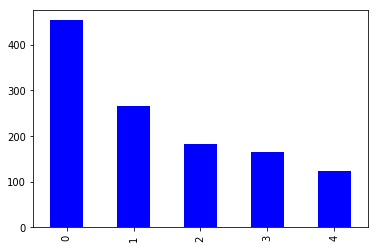

In [16]:
top5reviews_count.plot.bar(stacked=True, colormap='winter')

In [18]:
dfpricing_hint= df['pricing_hint'].value_counts()
dfpricing_hint= dfpricing_hint[0:10]

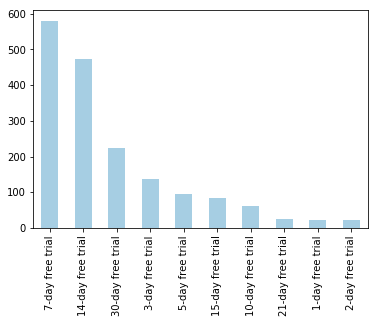

In [19]:
dfpricing_hint.plot.bar(stacked=True, colormap='Paired')

In [20]:
top10pricing_hint = df['pricing_hint'].value_counts()
top10pricing_hint[0:10]

7-day free trial     580
14-day free trial    473
30-day free trial    223
3-day free trial     137
5-day free trial      96
15-day free trial     84
10-day free trial     61
21-day free trial     25
1-day free trial      22
2-day free trial      22
Name: pricing_hint, dtype: int64

In [21]:
difftitle= df['title'].dropna()

In [22]:
difftitle.value_counts()

Facebook Live Chat                2
Facebook Messenger Marketing      2
Form Builder with File Upload     2
Recently Viewed Products          2
Abandoned Cart Messenger          2
Google Customer Reviews           2
Facebook Feed                     2
Product Options and Customizer    2
SMS Notifications                 2
COD Order Confirmation            2
Twitter Feed                      2
Social Media Icons                2
MailerLite Email Marketing        2
Bundle Products                   2
Advanced Cash on Delivery         2
Accessibility Toolkit             1
Recently 3                        1
Quick View Plus                   1
UVdesk eCommerce Helpdesk         1
DealzyClub                        1
Live Preview Options by Webyze    1
Free Trust Badge Master           1
Eber ‑ Smart Member Solution      1
Product Options + Testimonials    1
Power Tools Suite                 1
Chargify Accounts                 1
Connex for QuickBooks             1
Google Shopping Feed Audit  

# Analysis of title Data

In [23]:
title= df['title'].dropna()

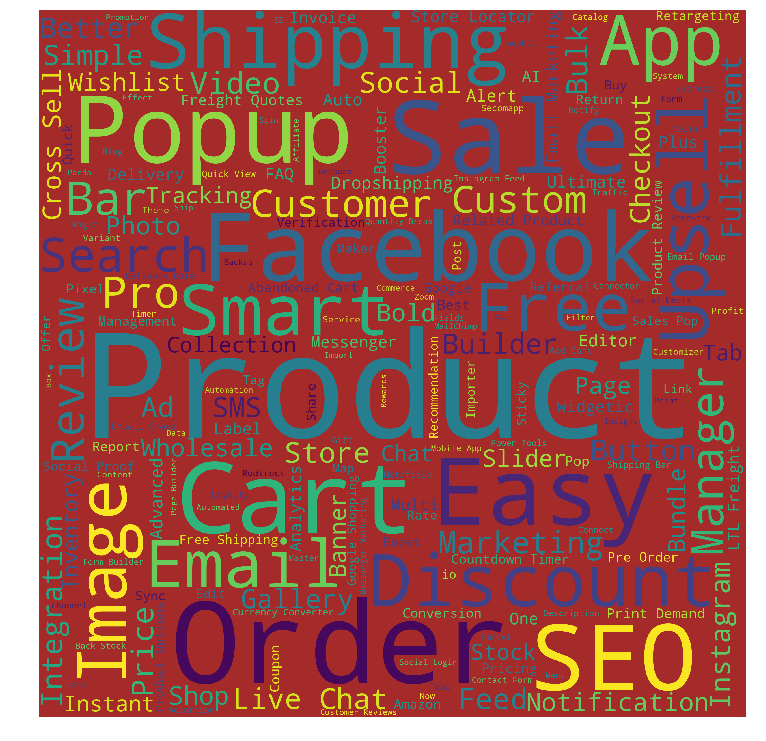

In [24]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(title)

In [25]:
title = title.tolist()

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(title))

print(data_words[:1])

[['hit', 'counter']]


In [28]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['hit', 'counter']


In [29]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['counter'], ['category'], ['ad', 'varinode'], ['metafield']]


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [32]:
id2word[0]

'counter'

In [33]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('counter', 1)], [('category', 1)], [('ad', 1), ('varinode', 1)]]

# Build LDA Model for title Data

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"sale" + 0.027*"app" + 0.025*"ad" + 0.025*"search" + '
  '0.019*"notification" + 0.016*"facebook" + 0.015*"newsletter" + 0.014*"pop" '
  '+ 0.013*"automation" + 0.013*"page"'),
 (1,
  '0.041*"image" + 0.039*"bar" + 0.034*"seo" + 0.027*"manager" + '
  '0.019*"button" + 0.018*"gallery" + 0.018*"size" + 0.017*"hero" + '
  '0.015*"custom" + 0.015*"menu"'),
 (2,
  '0.044*"discount" + 0.039*"marketing" + 0.039*"email" + 0.027*"store" + '
  '0.021*"upsell" + 0.019*"cross_sell" + 0.018*"slider" + 0.017*"analytic" + '
  '0.017*"builder" + 0.017*"traffic"'),
 (3,
  '0.051*"order" + 0.049*"shipping" + 0.032*"onesaas" + 0.027*"price" + '
  '0.021*"stock" + 0.019*"term" + 0.019*"integration" + 0.014*"subscription" + '
  '0.013*"print" + 0.013*"login"'),
 (4,
  '0.114*"product" + 0.047*"cart" + 0.039*"popup" + 0.021*"option" + '
  '0.019*"messenger" + 0.018*"review" + 0.018*"label" + 0.018*"customer" + '
  '0.017*"feed" + 0.017*"age"')]


In [36]:
# Compute Model Perplexity and Coherence Score

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.717528118189269

Coherence Score:  0.7418386171211208


In [38]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.275498 -0.058032       1        1  21.869867
2     -0.111853 -0.228389       2        1  20.382959
0     -0.024775  0.107193       3        1  19.503155
1     -0.036617  0.174051       4        1  19.295778
3     -0.102253  0.005176       5        1  18.948244, topic_info=     Category        Freq            Term       Total  loglift  logprob
7     Default  124.000000         product  124.000000  30.0000  30.0000
17    Default   48.000000           order   48.000000  29.0000  29.0000
79    Default   52.000000            cart   52.000000  28.0000  28.0000
56    Default   47.000000        shipping   47.000000  27.0000  27.0000
127   Default   45.000000        discount   45.000000  26.0000  26.0000
136   Default   44.000000            sale   44.000000  25.0000  25.0000
41    Default   39.000000           image   39.000000  24.0000  24.0000
43    Default   43.000000           popup   43.000000  23.0000  23.0000
105   Default   40.000000       marketing   40.000000  22.0000  22.0000
64    Default   40.000000           email   40.000000  21.0000  21.0000
103   Default   38.000000             bar   38.000000  20.0000  20.0000
33    Default   33.000000             seo   33.000000  19.0000  19.0000
1571  Default   30.000000         onesaas   30.000000  18.0000  18.0000
52    Default   28.000000           store   28.000000  17.0000  17.0000
8     Default   26.000000           price   26.000000  16.0000  16.0000
141   Default   26.000000         manager   26.000000  15.0000  15.0000
123   Default   26.000000             app   26.000000  14.0000  14.0000
2     Default   25.000000              ad   25.000000  13.0000  13.0000
31    Default   24.000000          search   24.000000  12.0000  12.0000
6     Default   23.000000          option   23.000000  11.0000  11.0000
331   Default   21.000000          upsell   21.000000  10.0000  10.0000
121   Default   20.000000           stock   20.000000   9.0000   9.0000
281   Default   20.000000      cross_sell   20.000000   8.0000   8.0000
107   Default   18.000000            term   18.000000   7.0000   7.0000
153   Default   19.000000    notification   19.000000   6.0000   6.0000
190   Default   18.000000     integration   18.000000   5.0000   5.0000
285   Default   20.000000       messenger   20.000000   4.0000   4.0000
78    Default   20.000000          review   20.000000   3.0000   3.0000
137   Default   18.000000          button   18.000000   2.0000   2.0000
130   Default   20.000000           label   20.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
56     Topic5   46.448795        shipping   47.063461   1.6503  -3.0138
1571   Topic5   29.960060         onesaas   30.632351   1.6413  -3.4523
8      Topic5   25.818737           price   26.434551   1.6399  -3.6010
121    Topic5   19.438871           stock   20.053743   1.6323  -3.8849
107    Topic5   18.304935            term   18.918030   1.6305  -3.9450
190    Topic5   18.197737     integration   18.811094   1.6303  -3.9508
249    Topic5   12.844256    subscription   13.469805   1.6159  -4.2992
48     Topic5   12.105205           print   12.718203   1.6141  -4.3585
147    Topic5   12.103296           login   12.716638   1.6140  -4.3587
411    Topic5   11.433024        tracking   12.046961   1.6112  -4.4156
47     Topic5   10.721507          demand   11.334394   1.6079  -4.4799
1630   Topic5   11.128936          myterm   11.770885   1.6074  -4.4426
1626   Topic5   11.128934           saasu   11.770885   1.6074  -4.4426
1621   Topic5   11.128918         version   11.770882   1.6074  -4.4426
1627   Topic5   11.055422  qecartanimator   11.738603   1.6035  -4.4492
65     Topic5    9.991226          report   10.608762   1.6035  -4.5504
19     Topic5    9.061119            form    9.675579   1.5978  -4.6481
218    Topic5    9.021686           alert    9.6370

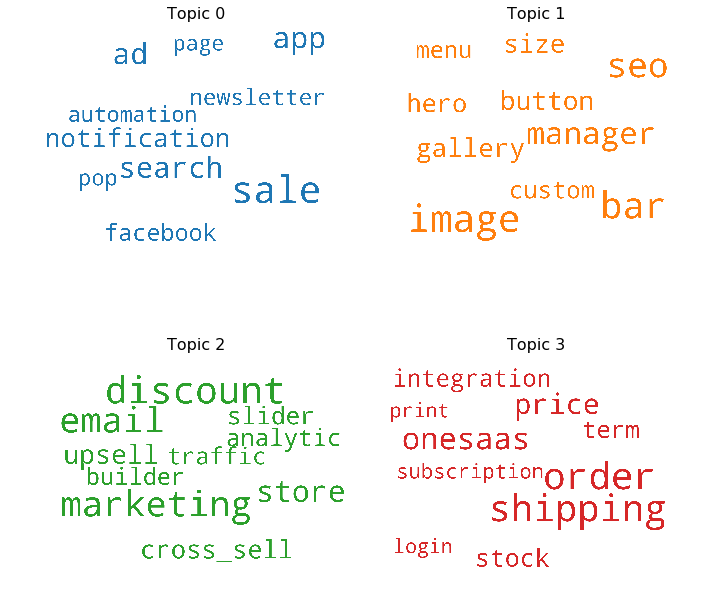

In [39]:

# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [40]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [41]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [42]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.719465
1,0.010,6,0.724400
2,0.010,10,0.729927
3,0.010,15,0.726885
4,0.010,20,0.720298
5,0.100,2,0.708997
6,0.100,6,0.741070
7,0.100,10,0.737512
8,0.100,15,0.723108
9,0.100,20,0.722655


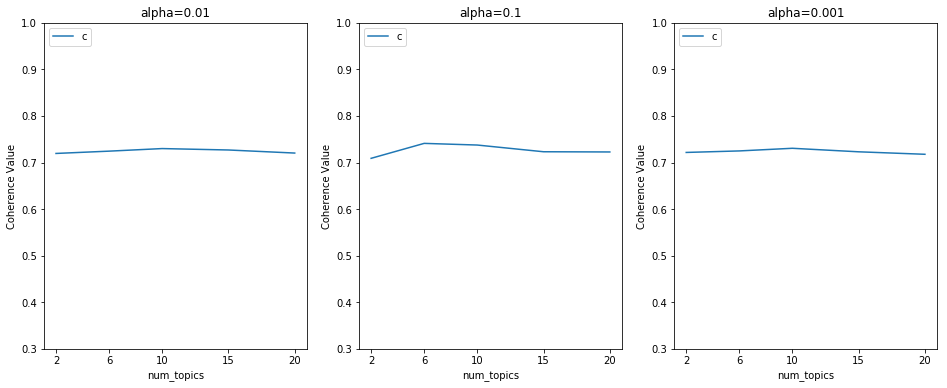

In [43]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [44]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [45]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.120*"page" + 0.050*"brand" + 0.001*"collection" + 0.001*"variant" + '
  '0.001*"genie" + 0.001*"dot" + 0.001*"gempage" + 0.001*"funnel" + '
  '0.001*"ambassador" + 0.001*"account"'),
 (1,
  '0.186*"popup" + 0.153*"seo" + 0.081*"size" + 0.047*"inventory" + '
  '0.036*"coupon" + 0.031*"promotion" + 0.028*"exit" + 0.016*"json" + '
  '0.015*"html" + 0.013*"sitemap"'),
 (2,
  '0.224*"order" + 0.121*"manager" + 0.064*"fulfillment" + 0.053*"tracking" + '
  '0.035*"store_locator" + 0.034*"management" + 0.033*"purchase" + 0.028*"tag" '
  '+ 0.017*"status" + 0.007*"webkul"'),
 (3,
  '0.034*"edit" + 0.016*"bulk" + 0.005*"category" + 0.001*"genie" + '
  '0.001*"redirect" + 0.001*"control" + 0.001*"pencil" + 0.001*"list" + '
  '0.001*"booster" + 0.001*"cleverific"'),
 (4,
  '0.264*"discount" + 0.138*"app" + 0.081*"volume" + 0.037*"generator" + '
  '0.012*"scarcity" + 0.008*"reminder" + 0.001*"kit" + 0.000*"pixel" + '
  '0.000*"box" + 0.000*"sac"'),
 (5,
  '0.219*"price" + 0.084*"report" +

In [46]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.548018785614053

Coherence Score:  0.6522824556529664


In [47]:
coherence_model_lda.get_coherence_per_topic()

[0.7271465787248246,
 0.6413618216667162,
 0.6601923736501762,
 0.6985238271392465,
 0.6130548418598547,
 0.6325404190417233,
 0.615280745428518,
 0.6670410502500064,
 0.6627729097095606,
 0.6394947577413831,
 0.6621701584628161,
 0.620547916043882,
 0.6132439066198125,
 0.6641137375435767,
 0.6667517909123996]

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.347543 -0.120562       1        1  10.089886
10     0.100043  0.342146       2        1   9.871079
14    -0.023008 -0.015142       3        1   7.509149
2     -0.032960 -0.017705       4        1   7.374609
9     -0.034912 -0.018377       5        1   7.199755
1     -0.033541 -0.017902       6        1   7.001612
12    -0.035592 -0.018418       7        1   6.634448
8     -0.036688 -0.018624       8        1   6.524629
7     -0.034298 -0.017954       9        1   6.516614
6     -0.038539 -0.017642      10        1   6.034317
4     -0.037172 -0.018170      11        1   5.675768
11    -0.038383 -0.017504      12        1   5.635680
5     -0.036702 -0.016263      13        1   4.841395
0     -0.034054 -0.014610      14        1   4.599074
3     -0.031736 -0.013273      15        1   4.491994, topic_info=     Category        Freq            Term       Total  loglift  logprob
7     Default  157.000000         product  157.000000  30.0000  30.0000
127   Default   76.000000        discount   76.000000  29.0000  29.0000
17    Default   83.000000           order   83.000000  28.0000  28.0000
136   Default   68.000000            sale   68.000000  27.0000  27.0000
43    Default   66.000000           popup   66.000000  26.0000  26.0000
103   Default   63.000000             bar   63.000000  25.0000  25.0000
8     Default   54.000000           price   54.000000  24.0000  24.0000
79    Default   69.000000            cart   69.000000  23.0000  23.0000
41    Default   57.000000           image   57.000000  22.0000  22.0000
33    Default   54.000000             seo   54.000000  21.0000  21.0000
56    Default   63.000000        shipping   63.000000  20.0000  20.0000
105   Default   59.000000       marketing   59.000000  19.0000  19.0000
64    Default   59.000000           email   59.000000  18.0000  18.0000
141   Default   45.000000         manager   45.000000  17.0000  17.0000
123   Default   40.000000             app   40.000000  16.0000  16.0000
78    Default   41.000000          review   41.000000  15.0000  15.0000
85    Default   39.000000          slider   39.000000  14.0000  14.0000
77    Default   39.000000        customer   39.000000  13.0000  13.0000
2     Default   38.000000              ad   38.000000  12.0000  12.0000
31    Default   37.000000          search   37.000000  11.0000  11.0000
6     Default   37.000000          option   37.000000  10.0000  10.0000
52    Default   41.000000           store   41.000000   9.0000   9.0000
14    Default   28.000000            page   28.000000   8.0000   8.0000
121   Default   32.000000           stock   32.000000   7.0000   7.0000
107   Default   31.000000            term   31.000000   6.0000   6.0000
331   Default   33.000000          upsell   33.000000   5.0000   5.0000
280   Default   30.000000        analytic   30.000000   4.0000   4.0000
45    Default   31.000000            feed   31.000000   3.0000   3.0000
101   Default   31.000000         builder   31.000000   2.0000   2.0000
459   Default   28.000000         traffic   28.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
336   Topic15    0.131290         booster    1.348654   0.7734  -7.4431
523   Topic15    0.130794      cleverific    1.345027   0.7723  -7.4469
122   Topic15    0.130599      breadcrumb    1.344696   0.7711  -7.4483
171   Topic15    0.130503      power_tool    1.344662   0.7704  -7.4491
347   Topic15    0.130589          hextom    1.346699   0.7695  -7.4484
1571  Topic15    0.130326         onesaas    1.344566   0.7691  -7.4504
1620  Topic15    0.130318            myob    1.344521   0.7691  -7.4505
1478  Topic15    0.130309             pwa    1.344467   0.7690  -7.4506
1215  Topic15    0.130307      accounting    1.344461   0.7690  -7.4506
1613  Topic15    0.130307        hapilogi    1.344457   0.7690  -7.4506
1626  Topic15  

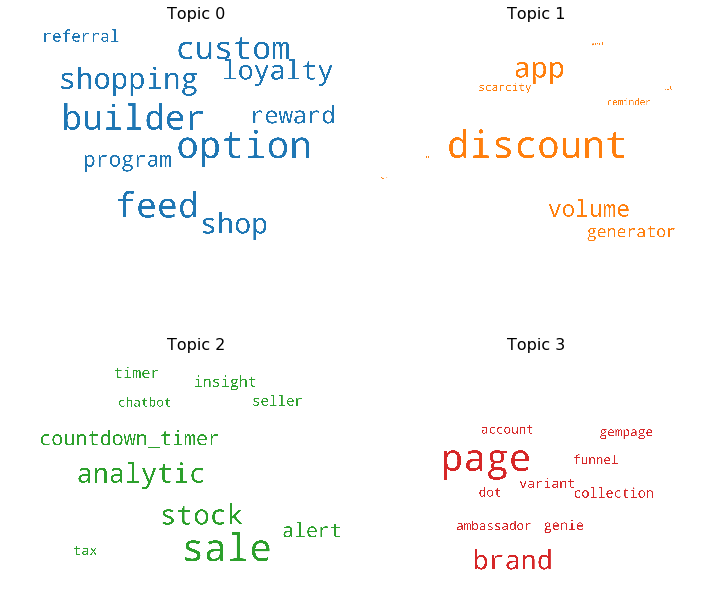

In [49]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()